In [78]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import sparse,  io, linalg
import pickle
from tqdm import tqdm_notebook as tqdm
import networkx as nx
import snap


def plot_log_log(records):
    fig, ax = plt.subplots()
    # Remove zero values
    records = records[np.array([idx for idx in range(records.shape[0]) if records[idx, 0]>0 and records[idx,1] > 0]),:]
    #median_x, median_y = zip(*sorted((xVal, np.median([yVal for a, yVal in zip(records[:,0], records[:,1]) if xVal==a])) for xVal in set(records[:,0])))
    plt.scatter([np.log(r) for r in records[:,0]], [np.log(r) for r in  records[:,1]],s=0.5)
    # Todo add median code
    
def plot(records):
    fig, ax = plt.subplots()
    # Remove zero values
    records = records[np.array([idx for idx in range(records.shape[0]) if records[idx, 0]>0 and records[idx,1] > 0]),:]
    #median_x, median_y = zip(*sorted((xVal, np.median([yVal for a, yVal in zip(records[:,0], records[:,1]) if xVal==a])) for xVal in set(records[:,0])))
    plt.scatter([(r) for r in records[:,0]], [(r) for r in  records[:,1]],s=0.5)
    # Todo add median code
    
    
def plot_log_log_summary(records,B=20,summary=np.median, discrete=False):
    fig, ax = plt.subplots()
    records = records[np.array([idx for idx in range(records.shape[0]) if records[idx, 0]>0 and records[idx,1] > 0]),:]


    xs = [np.log(record[0]) for record in records]
    ys = [np.log(record[1]) for record in records]
    plt.scatter([(x) for x in xs], [(y) for y in  ys],s=0.5)


    if discrete==False:
        x_max = max(xs) - min(xs)
        # bin into default 20 values
        binned_xs = [min(xs)+(x_max*i)/float(B) for i in range(B+1)]
        median_ys = []
        err = []
        for i in range(B):
            # find median y values for x values in [binned_xs[i], binned_xs[i+1])
            current_ys = [ys[j] for j in range(len(xs)) if binned_xs[i] <= xs[j] and xs[j] < binned_xs[i+1]]
            current_y = summary(current_ys)
            median_ys += [current_y]
            #err += [[median_ys-np.std(current_ys)*0.5,median_ys+np.std(current_ys)*0.5]]
            err += [np.std(current_ys)]
        plt.errorbar(binned_xs[1:], median_ys, marker='o', yerr=err,color='r')
    else:
        binned_xs = np.unique(xs)
        median_ys = []
        err = []
        for x in binned_xs:
            current_ys = [ys[j] for j in range(len(xs)) if xs[j] == x]
            current_y = summary(current_ys)
            median_ys += [current_y]
            #err += [[median_ys-np.std(current_ys)*0.5,median_ys+np.std(current_ys)*0.5]]
            err += [np.std(current_ys)]
        plt.errorbar(binned_xs, median_ys, marker='o', yerr=err,color='r')


    
def plot_summary(records,B=20,summary=np.median, discrete=False):
    fig, ax = plt.subplots()
    #records = records[np.array([idx for idx in range(records.shape[0]) if records[idx, 0]>0 and records[idx,1] > 0]),:]


    xs = [(record[0]) for record in records]
    ys = [(record[1]) for record in records]
    plt.scatter([(x) for x in xs], [(y) for y in  ys],s=0.5)


    if discrete==False:
        x_max = max(xs) - min(xs)
        # bin into default 20 values
        binned_xs = [min(xs)+(x_max*i)/float(B) for i in range(B+1)]
        median_ys = []
        err = []
        for i in range(B):
            # find median y values for x values in [binned_xs[i], binned_xs[i+1])
            current_ys = [ys[j] for j in range(len(xs)) if binned_xs[i] <= xs[j] and xs[j] < binned_xs[i+1]]
            current_y = summary(current_ys)
            median_ys += [current_y]
            #err += [[median_ys-np.std(current_ys)*0.5,median_ys+np.std(current_ys)*0.5]]
            err += [np.std(current_ys)]
        plt.errorbar(binned_xs[1:], median_ys, marker='o', yerr=err,color='r')
    else:
        binned_xs = np.unique(xs)
        median_ys = []
        err = []
        for x in binned_xs:
            current_ys = [ys[j] for j in range(len(xs)) if xs[j] == x]
            current_y = summary(current_ys)
            median_ys += [current_y]
            #err += [[median_ys-np.std(current_ys)*0.5,median_ys+np.std(current_ys)*0.5]]
            err += [np.std(current_ys)]
        plt.errorbar(binned_xs, median_ys, marker='o', yerr=err,color='r')





In [2]:
Don2Com = np.load('/Users/vaishnan/Documents/15826/campaign-contribution-text/Don2Com.data.npy')

In [64]:
G = digraph_from_array(get_records_of_year(Don2Com, 2006))
# Reading graph 


In [76]:
#mutual neighbors
pwl = []
for e in tqdm(G.edges_iter()):
    wt = G[e[0]][e[1]]['weight']/float(G.degree(e[0],weight='weight')+G.degree(e[1],weight='weight'))
    nbr1 = set(G.neighbors(e[1]))
    nbr2 = []
    for v in G.neighbors(e[0]):
        nbr2 += G.neighbors(v)
    nbr2 = set(nbr2)
    common_nbrs= set.intersection(nbr1,nbr2)
    #score = sum([1/np.log(len(college_messages_G.neighbors(v))) for v in common_nbrs])
    score = len(set.intersection(nbr1,nbr2))/float(len(set.union(nbr1,nbr2)))
    #score = len(set.intersection(nbr1,nbr2)
    pwl += [(wt, score)]

/Users/vaishnan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in divide


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


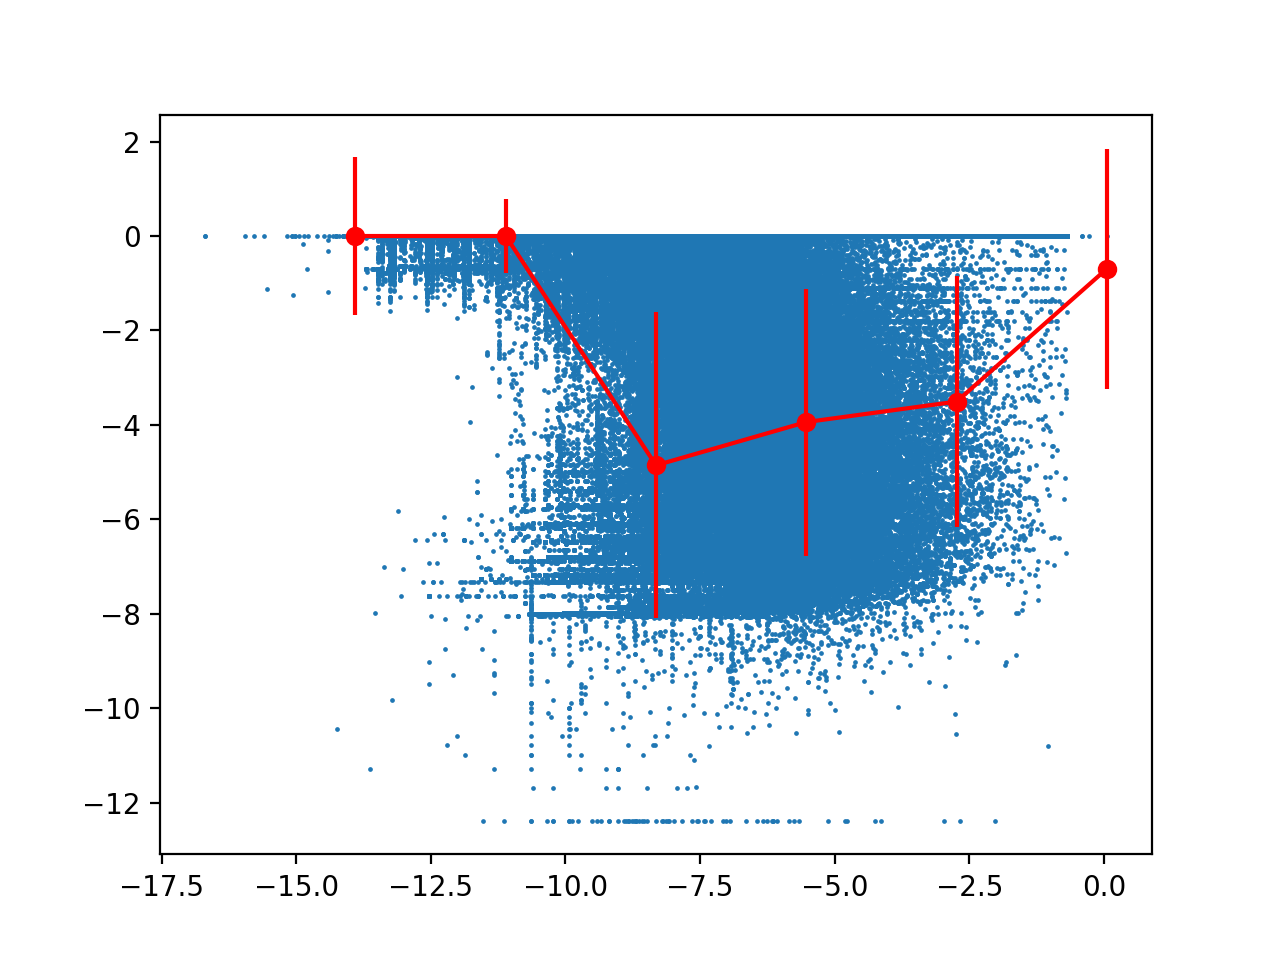

In [79]:
#plot_log_log(np.asarray(pwl))
plot_log_log_summary(np.asarray(pwl),B=6)

In [48]:
pwl

[(0.014826596165344177, 0.004914004914004914),
 (0.004482067746937885, 0.002457002457002457),
 (0.03731441994786798, 0.014084507042253521),
 (0.017166113431772809, 0.00036153289949385393),
 (0.022956427376517381, 0.0014698677119059284),
 (0.015803699695756221, 0.008287292817679558),
 (0.010852513855424881, 0.004807692307692308),
 (0.010456971228222795, 0.00034094783498124785),
 (0.056920257924487509, 0.0008726003490401396),
 (0.0088605859579334867, 0.007371007371007371),
 (0.0066754919377816592, 0.0027149321266968325),
 (0.013185219376250536, 0.0019292604501607716),
 (0.020774743531829915, 0.0003729951510630362),
 (0.02258262281357043, 0.0005558643690939411),
 (0.019746371447677276, 0.0009049773755656109),
 (0.014223110727314808, 0.002857142857142857),
 (0.0082239071468140947, 0.0003315649867374005),
 (0.0084980807265571806, 0.0006747638326585695),
 (0.0096999587067574319, 0.0019083969465648854),
 (0.021219001258831204, 0.0017605633802816902),
 (0.0024586419240338712, 0.000329163923633

545it [00:24, 22.14it/s]